In [112]:
from pandas.plotting import register_matplotlib_converters
from scipy.stats import pearsonr 
from scipy.stats import linregress
from sklearn.metrics import adjusted_mutual_info_score, mutual_info_score

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(rc={'figure.figsize': (15, 8)})

In [113]:
inflation= pd.read_csv('data/inflation.csv', sep=",")
monetary_base= pd.read_csv('data/monetary_base.csv', sep=",", thousands='.')

In [114]:
inflation['Dates'] = pd.to_datetime(inflation['Dates'], format='%d/%m/%Y')    
inflation.index = inflation['Dates']
inflation = inflation.drop(['Dates'], axis=1)

In [115]:
monetary_base['Dates'] = pd.to_datetime(monetary_base['Dates'], format='%d/%m/%Y')    
monetary_base.index = monetary_base['Dates']
monetary_base = monetary_base.drop(['Dates'], axis=1)

[None]

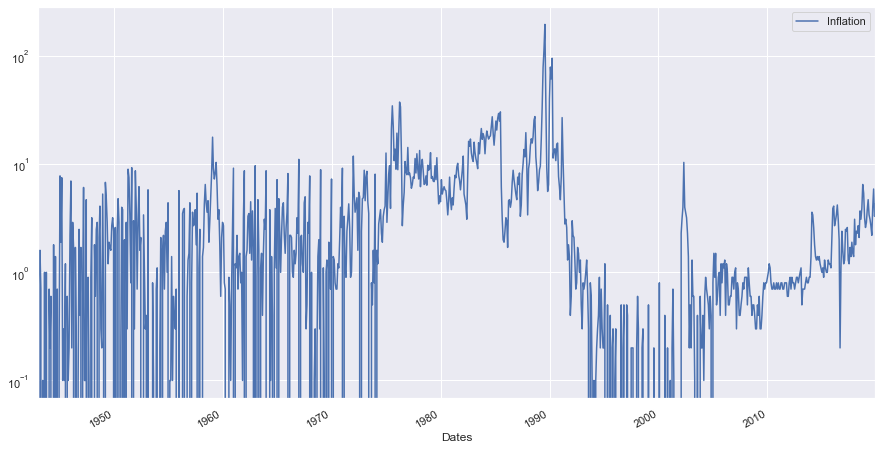

In [116]:
ax = inflation.plot()
ax.set(yscale="log")

[None]

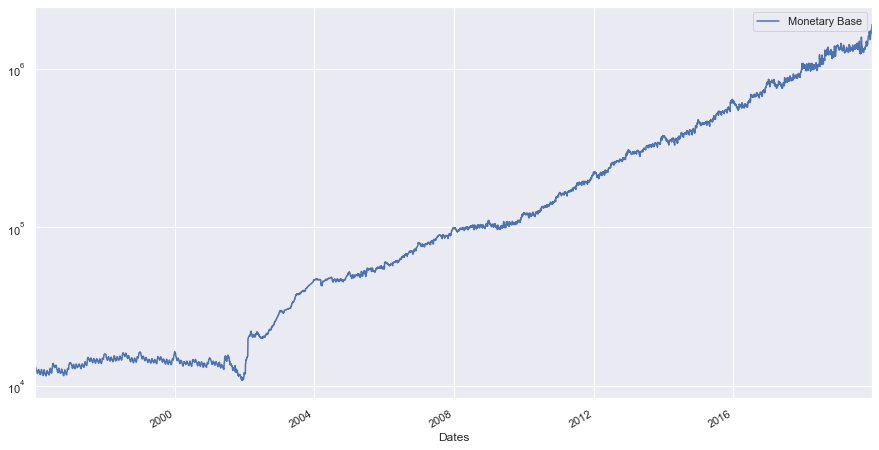

In [117]:
ax = monetary_base.plot()
ax.set(yscale="log")

In [118]:
inflation_yearly_1996 = inflation.truncate(before = '1996-01-01')
inflation_yearly_1996 = inflation_yearly_1996.apply(lambda x : x/100+1)
inflation_yearly_1996 = inflation_yearly_1996.resample('Y').apply(lambda x : x.cumprod())
inflation_yearly_1996 = inflation_yearly_1996.resample('A').last().apply(lambda x : (x-1)*100)

In [119]:
change_monetary_base_yearly_1996 = monetary_base.truncate(before = '1996-01-01')
change_monetary_base_yearly_1996 = change_monetary_base_yearly_1996.resample('Y').mean().pct_change()*100

In [120]:
yearly_data_since_1996 = pd.DataFrame(change_monetary_base_yearly_1996)
yearly_data_since_1996 = yearly_data_since_1996.assign(Inflation = inflation_yearly_1996['Inflation']).dropna()

In [121]:
yearly_data_since_1996.plot

,Monetary Base,Inflation
Dates,,
1997-12-31,12.404216,0.395783
1998-12-31,7.054448,0.597786
1999-12-31,-2.647394,-1.889590
2000-12-31,-3.566412,-0.804935
2001-12-31,-5.368243,-1.398140
2002-12-31,60.979362,40.936862
2003-12-31,69.581882,3.545552
2004-12-31,28.824240,6.058043
2005-12-31,11.933062,12.229301


In [122]:
max_lag=4
rs = [yearly_data_since_1996['Inflation'].corr(yearly_data_since_1996['Monetary Base'].shift(lag)) for lag in np.arange(0, max_lag+1, 1)]

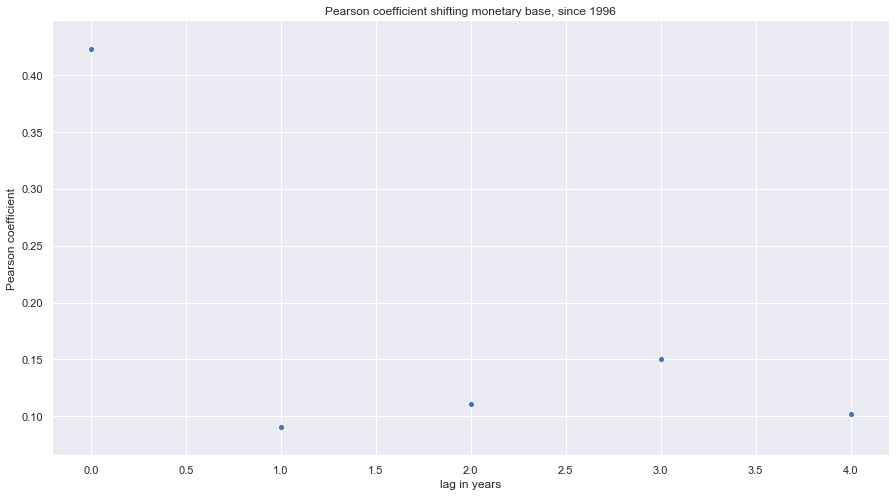

In [123]:
ax = sns.scatterplot(np.arange(0, 5, 1),rs)
ax.set(xlabel='lag in years', ylabel='Pearson coefficient',title='Pearson coefficient shifting monetary base, since 1996')
ax

In [124]:
yearly_inflation_since_2003=inflation.truncate(before='2003-01-01')
yearly_inflation_since_2003=yearly_inflation_since_2003.apply(lambda x:x/100+1)
yearly_inflation_since_2003=yearly_inflation_since_2003.resample('Y').apply(lambda x:x.cumprod())
yearly_inflation_since_2003=yearly_inflation_since_2003.resample('A').last().apply(lambda x:(x-1)*100)
yearly_change_monetary_base_since_2003=monetary_base.truncate(before='2003-01-01')
yearly_change_monetary_base_since_2003=yearly_change_monetary_base_since_2003.resample('Y').mean().pct_change()*100
data_since_2003=pd.DataFrame(yearly_change_monetary_base_since_2003)
data_since_2003=data_since_2003.assign(Inflation=yearly_inflation_since_2003['Inflation']).dropna()

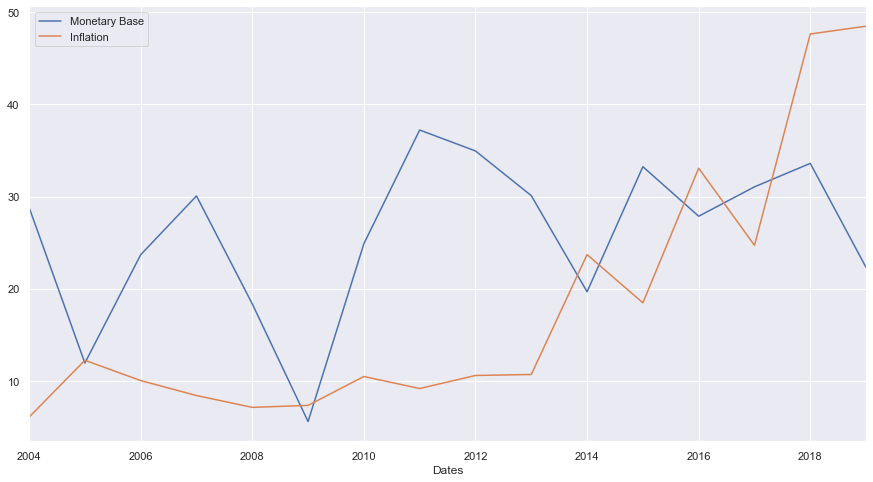

In [125]:
data_since_2003.plot()

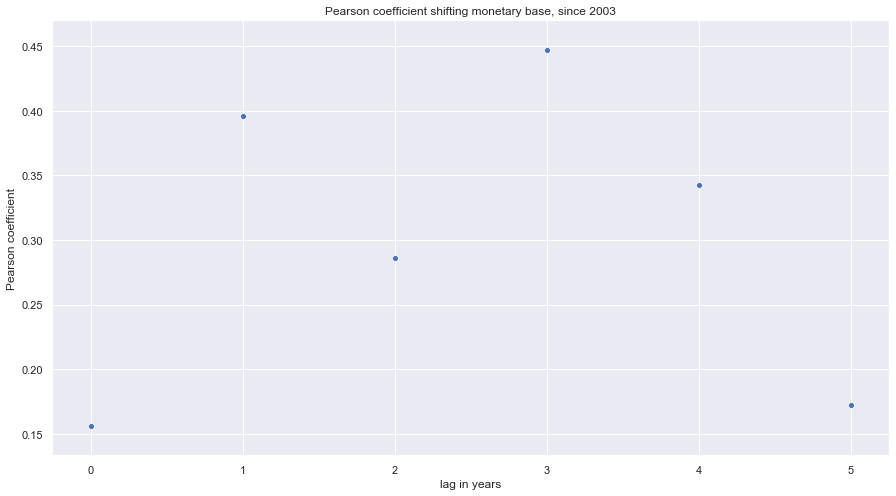

In [126]:
rs = [data_since_2003['Inflation'].corr(data_since_2003['Monetary Base'].shift(lag)) for lag in np.arange(0,6,1)]
ax = sns.scatterplot(np.arange(0,6,1),rs)
ax.set(xlabel='lag in years', ylabel='Pearson coefficient',title='Pearson coefficient shifting monetary base, since 2003')
plt.show()

## Working with 6 months intervals

In [127]:
midyearly_inflation_since_1996=inflation.truncate(before='1996-01-01')
midyearly_inflation_since_1996=midyearly_inflation_since_1996.apply(lambda x:x/100+1)
midyearly_inflation_since_1996=midyearly_inflation_since_1996.resample('6M').apply(lambda x:x.cumprod()[-1])
#midyearly_inflation_since_1996.index = midyearly_inflation_since_1996.index + pd.DateOffset(months=-1)
midyearly_inflation_since_1996=midyearly_inflation_since_1996.apply(lambda x:(x-1)*100)

In [128]:
midyearly_change_monetary_base_since_1996=monetary_base.truncate(before='1996-01-01')
midyearly_change_monetary_base_since_1996=midyearly_change_monetary_base_since_1996.resample('6M').mean().pct_change()*100

In [129]:
midyearly_data_since_1996=pd.DataFrame(midyearly_change_monetary_base_since_1996)
midyearly_data_since_1996=midyearly_data_since_1996.assign(Inflation=midyearly_inflation_since_1996['Inflation']).dropna()

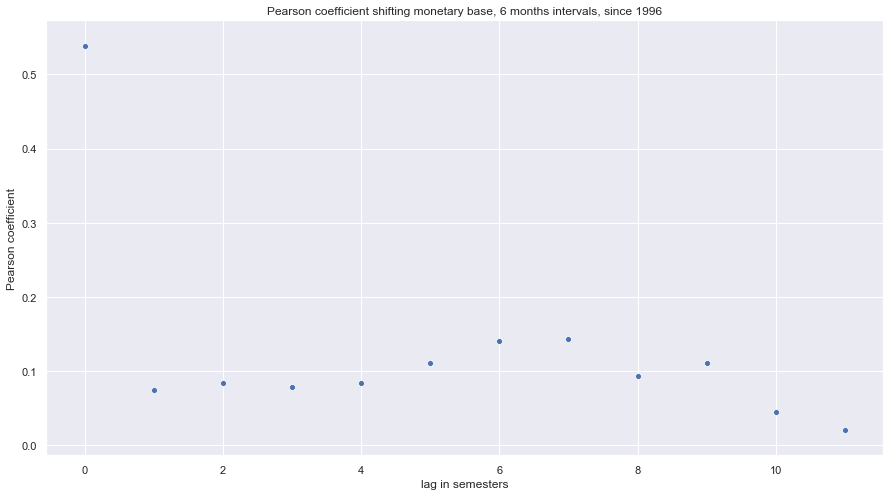

In [130]:
rs = [midyearly_data_since_1996['Inflation'].corr(midyearly_data_since_1996['Monetary Base'].shift(lag)) for lag in np.arange(0,12,1)]
ax = sns.scatterplot(np.arange(0,12,1),rs)
ax.set(xlabel='lag in semesters', ylabel='Pearson coefficient',title='Pearson coefficient shifting monetary base, 6 months intervals, since 1996')
plt.show()

In [131]:
midyearly_inflation_since_2003=inflation.truncate(before='2003-01-01')
midyearly_inflation_since_2003=midyearly_inflation_since_2003.apply(lambda x:x/100+1)
midyearly_inflation_since_2003=midyearly_inflation_since_2003.resample('6M').apply(lambda x:x.cumprod()[-1])
#midyearly_inflation_since_2003.index = midyearly_inflation_since_1996.index + pd.DateOffset(months=-1)
midyearly_inflation_since_2003=midyearly_inflation_since_2003.apply(lambda x:(x-1)*100)
midyearly_change_monetary_base_since_2003=monetary_base.truncate(before='2003-01-01')
midyearly_change_monetary_base_since_2003=midyearly_change_monetary_base_since_2003.resample('6M').mean().pct_change()*100
midyearly_data_since_2003=pd.DataFrame(midyearly_change_monetary_base_since_2003)
midyearly_data_since_2003=midyearly_data_since_2003.assign(Inflation=midyearly_inflation_since_2003['Inflation']).dropna()

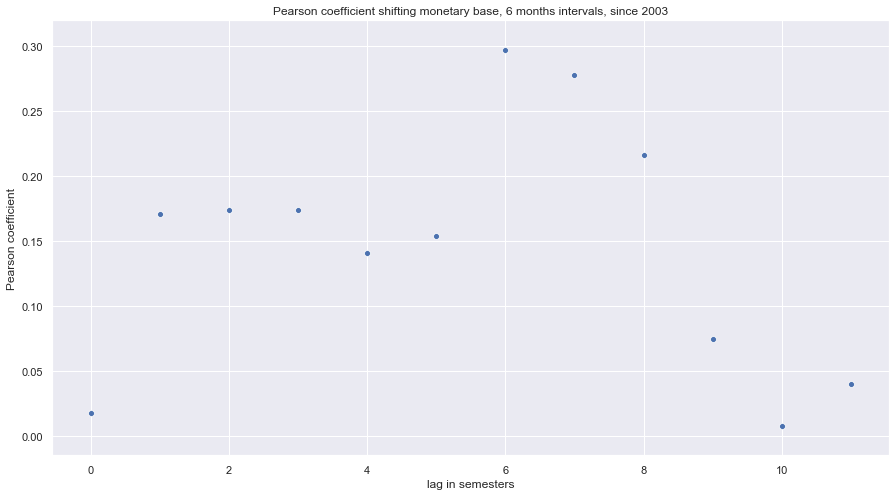

In [132]:
rs = [midyearly_data_since_2003['Inflation'].corr(midyearly_data_since_2003['Monetary Base'].shift(lag)) for lag in np.arange(0,12,1)]
ax = sns.scatterplot(np.arange(0,12,1),rs)
ax.set(xlabel='lag in semesters', ylabel='Pearson coefficient',title='Pearson coefficient shifting monetary base, 6 months intervals, since 2003')
plt.show()

After 2003, the best pearson coefficient is obtained with a 3 years lag, taking annual or biannual intervals.

## Working with 3 months intervals

In [133]:
trimester_inflation_since_2003=inflation.truncate(before='2003-01-01')
trimester_inflation_since_2003=trimester_inflation_since_2003.apply(lambda x:x/100+1)
trimester_inflation_since_2003=trimester_inflation_since_2003.resample('3M').apply(lambda x:x.cumprod()[-1])
#midyearly_inflation_since_2003.index = midyearly_inflation_since_1996.index + pd.DateOffset(months=-1)
trimester_inflation_since_2003=midyearly_inflation_since_2003.apply(lambda x:(x-1)*100)
trimester_change_monetary_base_since_2003=monetary_base.truncate(before='2003-01-01')
trimester_change_monetary_base_since_2003=trimester_change_monetary_base_since_2003.resample('3M').mean().pct_change()*100
trimester_data_since_2003=pd.DataFrame(trimester_change_monetary_base_since_2003)
trimester_data_since_2003=trimester_data_since_2003.assign(Inflation=midyearly_inflation_since_2003['Inflation']).dropna()

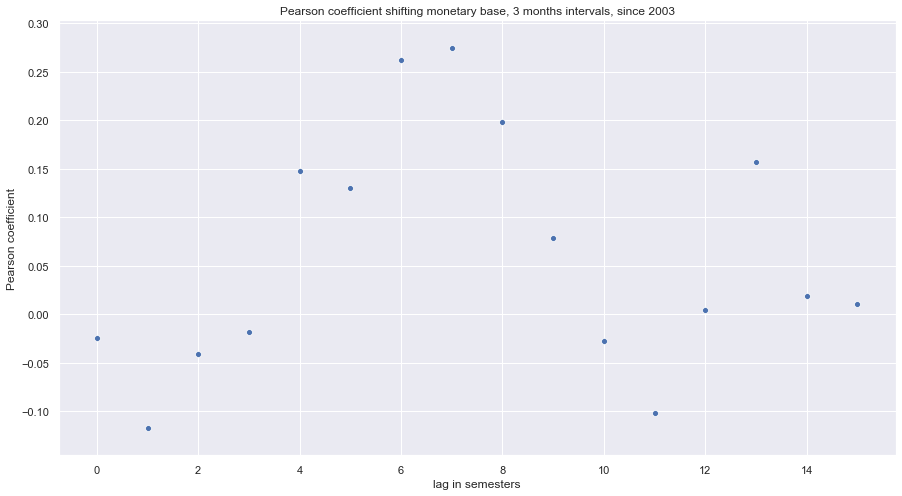

In [134]:
rs = [trimester_data_since_2003['Inflation'].corr(trimester_data_since_2003['Monetary Base'].shift(lag)) for lag in np.arange(0,16,1)]
ax = sns.scatterplot(np.arange(0,16,1),rs)
ax.set(xlabel='lag in semesters', ylabel='Pearson coefficient',title='Pearson coefficient shifting monetary base, 3 months intervals, since 2003')
plt.show()

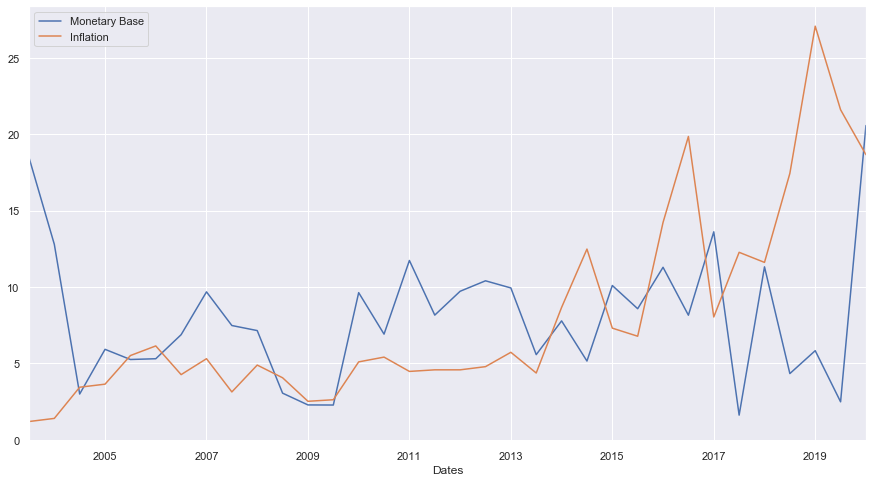

In [135]:
trimester_data_since_2003.plot()

taking into account variance of data

if we suppose the monthly change in mb is a rv with a var_rv and inflation is a rv with a var_inf, when we do a yearly
mean, the variance of the mean of each variable is reduced by sqrt(12)


In [136]:
def calc_MI(x, y, bins):
    c_xy = np.histogram2d(x, y, bins)[0]
    mi = mutual_info_score(None, None, contingency=c_xy)
    return mi

In [137]:
hist_infl, bin_edges = np.histogram(yearly_data_since_1996['Inflation'])
hist_mb, bin_edges = np.histogram(yearly_data_since_1996['Monetary Base'])

In [138]:
adjusted_mutual_info_score(yearly_data_since_1996['Inflation'],yearly_data_since_1996['Monetary Base'])

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


1.0

In [139]:
inflation_yearly_1996 = {}
monetary_base_yearly_change_1996 = {}
data_since_1996 = {}
for months in range(3, 15, 3):
    inflation_yearly_1996[months] = inflation.truncate(before = '1996-01-01')
    inflation_yearly_1996[months] = inflation_yearly_1996[months].apply(lambda x : x/100+1)
    inflation_yearly_1996[months] = inflation_yearly_1996[months].resample(str(months) + 'M').apply(lambda x:x.cumprod()[-1])
    inflation_yearly_1996[months] = inflation_yearly_1996[months].apply(lambda x:(x-1)*100)
    monetary_base_yearly_change_1996[months] = monetary_base.truncate(before='2003-01-01')
    monetary_base_yearly_change_1996[months] = monetary_base_yearly_change_1996[months].resample('Y').mean().pct_change()*100
    data_since_1996[months] = pd.DataFrame(monetary_base_yearly_change_1996[months])
    data_since_1996[months] = data_since_1996[months].assign(Inflation = inflation_yearly_1996[months]['Inflation']).dropna()

In [93]:
inflation_yearly_1996[12]

,Inflation
Dates,
1996-01-31,0.300000
1997-01-31,0.193794
1998-01-31,0.495679
1999-01-31,0.497789
2000-01-31,-1.596723
2001-01-31,-1.493790
2002-01-31,0.768934
2003-01-31,39.559180
2004-01-31,2.625601


SyntaxError: invalid syntax (<ipython-input-65-56b58a206d4f>, line 1)